In [3]:
# see https://rasterio.readthedocs.io/en/latest/quickstart.html
#https://rasterio.readthedocs.io/en/stable/topics/reading.html
import rasterio as rio
from matplotlib import pyplot as plt
import numpy as np

In [4]:
dataset =  rio.open('LC08_L1TP_188035_20180602_20180615_01_T1_B10.tif')
img = dataset.read(1)

In [7]:
print(dataset.name)
print(dataset.count)
print(dataset.width)
print(dataset.height)
print(dataset.bounds) # eastings and northings? distance from equator
print(dataset.transform) # affine transform to map pixel # to (x,y) spatial
# Matrix multiplacation differ to Reuben's convention, here:
# Matrix * pixel number column = coordinate column
print(dataset.crs)
print(type(dataset))
print(np.shape(dataset.read(1)))

LC08_L1TP_188035_20180602_20180615_01_T1_B10.tif
1
7701
7841
BoundingBox(left=384285.0, bottom=3870585.0, right=615315.0, top=4105815.0)
| 30.00, 0.00, 384285.00|
| 0.00,-30.00, 4105815.00|
| 0.00, 0.00, 1.00|
+init=epsg:32633
<class 'rasterio.io.DatasetReader'>
(7841, 7701)


In [7]:
import numpy.matlib

# transform pixels to positions with Affine array
X_pix = np.arange(dataset.width)
Y_pix = np.arange(dataset.height)

Aff = dataset.transform
Step = Aff[0]
L_1 = Aff[2]
U_end = Aff[5]

X_pos = np.arange(L_1,L_1+Step*(dataset.width),Step).reshape(dataset.width,1)
Y_pos = np.arange(U_end,U_end-Step*(dataset.height),-Step).reshape(dataset.height,1)

#X_pos2 = np.transpose(np.matlib.repmat(X_pos,1,dataset.height))
#Y_pos2 = np.matlib.repmat(Y_pos,1,dataset.width)

X_pos2,Y_pos2 = np.meshgrid(X_pos,Y_pos)

print(np.shape(Y_pos2))
print(np.shape(img))
print(X_pos[0])
print(Y_pos[0])

(7841, 7701)
(7841, 7701)
[384285.]
[4105815.]


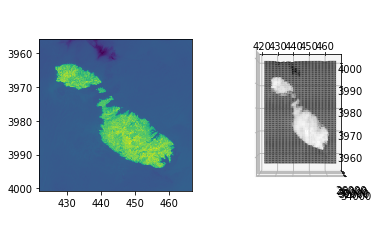

In [24]:

from mpl_toolkits.mplot3d import Axes3D


X_pos2_r = X_pos2[3500:5000,1250:2750]/1E3
Y_pos2_r = Y_pos2[3500:5000,1250:2750]/1E3
img_r = img[3500:5000,1250:2750]

fig = plt.figure()
ax = fig.add_subplot(121)
ax = plt.imshow(img_r,extent=(np.amin(X_pos2_r), np.amax(X_pos2_r), np.amax(Y_pos2_r), np.amin(Y_pos2_r)))

ax2 = fig.add_subplot(122, projection='3d')
surf = ax2.plot_surface(X_pos2_r,Y_pos2_r,img_r,cmap='jet')
ax2.set_zlim(25E3,35E3)
ax2.view_init(azim=-90, elev=90)
#print(np.amax(img_r))

25694


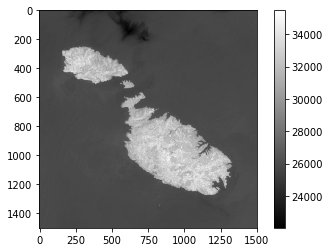

In [11]:
img_red = img[3500:5000,1250:2750]
plt.imshow(img_red,cmap = 'gray')
plt.colorbar()
print(img_red[0,0])

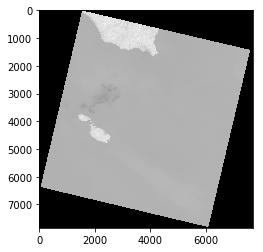

In [17]:
plt.imshow(img,cmap = 'gray')